# Jupyter Notebook Walkthrough with Example Analysis
source: https://www.dataquest.io/blog/jupyter-notebook-tutorial/
## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="darkgrid")

## Import files

In [5]:
df = pd.read_csv('fortune500.csv')

## Perform Exploratory Data Analysis & Data Cleaning

In [6]:
# check the overview of the dataset
df

Year  Rank                Company  Revenue (in millions)  \
0      1955     1         General Motors                 9823.5   
1      1955     2            Exxon Mobil                 5661.4   
2      1955     3             U.S. Steel                 3250.4   
3      1955     4       General Electric                 2959.1   
4      1955     5                 Esmark                 2510.8   
...     ...   ...                    ...                    ...   
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
0                      806  
1                    584.8  
2                    195.4  
3                    212.6  
4                     19.1  
...                    ...  
25495                  493  
25496                175.4  
25497                 57.8  
25498                 70.6  
25499                  584  

[25500 rows x 5 columns]

In [7]:
# rename the column
df.columns = ['year','rank','company','revenue','profit']

In [8]:
#check whether the data types is correct and no outlier
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [9]:
#looks like in profit column, there are values that is non-integer, lets find out 

non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

# result: return the full table of non-numeric value in profit column

year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

In [10]:
# check the full list of non-numeric values in profit column (set datatype will remove duplicate value)

set(df.profit[non_numeric_profits])

#result: all non-numeric values are N.A.

{'N.A.'}

In [11]:
#find the total rows that are non-numeric values 

total_non_numeric = len(df.profit[non_numeric_profits])
print(total_non_numeric)

# find the percentage of non numeric values 

percent_non_numeric = total_non_numeric / len(df) * 100
print(percent_non_numeric)

369
1.4470588235294117


'\nfrom the graph, most invalid values in a single year is less than 25.\nas the total data in a year is 500 (500 companies), 25 of 500 account for less than 4% \nother than a surge around 90s, most years have less than 5 missing values in general\na better approach is to fill in the missing value, but for this practice lets says the missing value is acceptable and we will remove those rows\n'

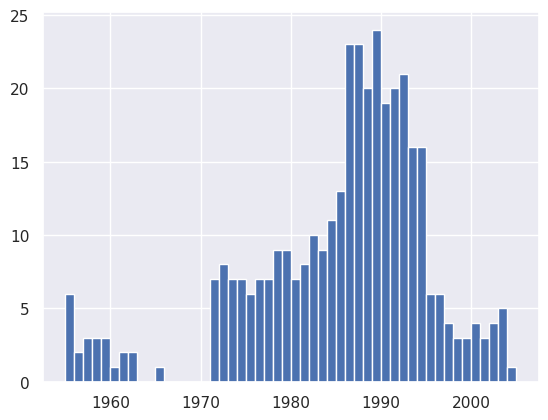

In [12]:
#check if the rows that contain N.A. are uniformly distributed, if yes its acceptable to remove them from dataset.

bin_sizes,_,_ = plt.hist(df.year[non_numeric_profits], bins=range(1955,2006))

'''
from the graph, most invalid values in a single year is less than 25.
as the total data in a year is 500 (500 companies), 25 of 500 account for less than 4% 
other than a surge around 90s, most years have less than 5 missing values in general
a better approach is to fill in the missing value, but for this practice lets says the missing value is acceptable and we will remove those rows
'''

In [14]:
# update the df without non-numeric values in profit column
df = df.loc[~non_numeric_profits]

# convert all string in profit column to numeric_value (float64)
df.profit = df.profit.apply(pd.to_numeric)

#check the dtypes
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

## Analyse with Pandas & Visualise Graph with Matplotlib
**Question:**

How is the profits of the largest 500 companies in US chaged historically?

In [15]:
# lets have an overview of the dataset 
df

year  rank                company  revenue  profit
0      1955     1         General Motors   9823.5   806.0
1      1955     2            Exxon Mobil   5661.4   584.8
2      1955     3             U.S. Steel   3250.4   195.4
3      1955     4       General Electric   2959.1   212.6
4      1955     5                 Esmark   2510.8    19.1
...     ...   ...                    ...      ...     ...
25495  2005   496        Wm. Wrigley Jr.   3648.6   493.0
25496  2005   497         Peabody Energy   3631.6   175.4
25497  2005   498  Wendy's International   3630.4    57.8
25498  2005   499     Kindred Healthcare   3616.6    70.6
25499  2005   500   Cincinnati Financial   3614.0   584.0

[25131 rows x 5 columns]

## Plot the graph on average profit of Fortune 500 company from 1955 to 2005

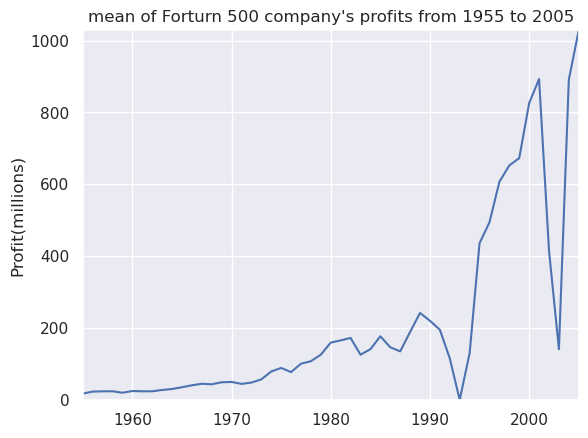

In [17]:
#group the selected column in dataset based on year and store result as an object 
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')

# perform avg operation to check the average result for each year 
year_avgs = group_by_year.mean()

x1 = year_avgs.index
y1 = year_avgs.profit
fig, ax = plt.subplots()

def plot(x, y, ax, title, y_label):
    # set the title of the plot
    ax.set_title(title)
    # set the label for y-axis
    ax.set_ylabel(y_label)
    # plot the data on the provided axis
    ax.plot(x,y)
    #adjust the margins of the plot to ensure data fits nicely within the axis
    ax.margins(x=0,y=0)

plot(x1, y1, ax, "mean of Forturn 500 company's profits from 1955 to 2005", "Profit(millions)")
plt.show()

## Plot the graph of average revenue for Fortune 500 company from 1955 to 2005

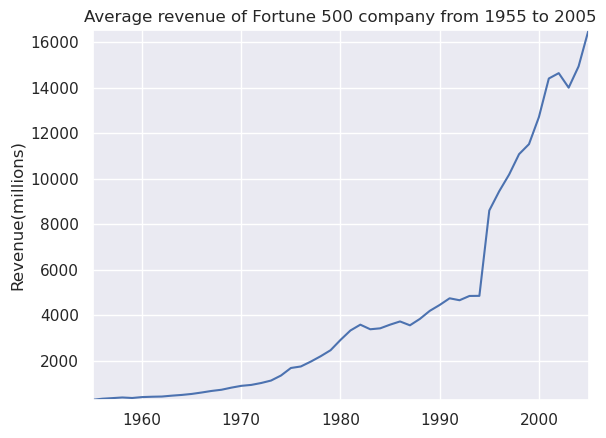

In [18]:
y2 = year_avgs.revenue
fig1, ax1 = plt.subplots()

plot(x1, y2, ax1, "Average revenue of Fortune 500 company from 1955 to 2005", "Revenue(millions)")
plt.show()

## Plot the graph including the +/- standard deviation of profit & revenue  

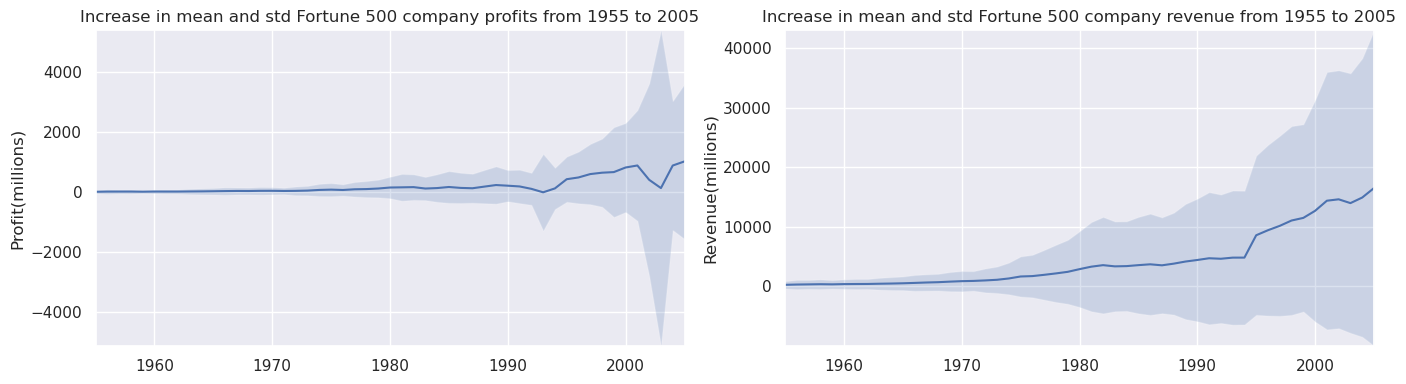

In [22]:
# new graph that will show the original graph with +/- their standard deviations 
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

#create a figure and two subplot axes arranged side by side
fig, (ax1, ax2) = plt.subplots(ncols=2)

#set the title & y_label for the graph
title1 = 'Increase in mean and std Fortune 500 company profits from 1955 to 2005'
y_label1 = 'Profit(millions)'
title2 = 'Increase in mean and std Fortune 500 company revenue from 1955 to 2005'
y_label2 = 'Revenue(millions)'

# getting the stds for profit & revenue
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values

# create the line plots graph wth filled standard deviations area on respective axes (ax1 & ax2)
plot_with_std(x1, y1, stds1, ax1, title1, y_label1)
plot_with_std(x1, y2, stds2, ax2, title2, y_label2)

# set the size of figure to 14 inches wide and 4 inches tall
fig.set_size_inches(14,4)
fig.tight_layout()